## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [10]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# import the libraries as shown below
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Crop past dataset1/train'
valid_path = '/content/drive/MyDrive/Crop past dataset1/test'


In [14]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [15]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [16]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Crop past dataset1/train/*')

In [17]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [19]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Crop past dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2400 images belonging to 15 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Crop past dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1500 images belonging to 15 classes.


In [24]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [29]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-29-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
150/150 [==============================] - 48s 318ms/step - loss: 1.5422 - accuracy: 0.8788 - val_loss: 1.4641 - val_accuracy: 0.8853
Epoch 2/20
150/150 [==============================] - 47s 316ms/step - loss: 1.5961 - accuracy: 0.8896 - val_loss: 1.8482 - val_accuracy: 0.8900
Epoch 3/20
150/150 [==============================] - 48s 320ms/step - loss: 1.3024 - accuracy: 0.8996 - val_loss: 1.2236 - val_accuracy: 0.9047
Epoch 4/20
150/150 [==============================] - 47s 317ms/step - loss: 1.5878 - accuracy: 0.8946 - val_loss: 1.0469 - val_accuracy: 0.9233
Epoch 5/20
150/150 [==============================] - 48s 321ms/step - loss: 1.3686 - accuracy: 0.9008 - val_loss: 0.9120 - val_accuracy: 0.9320
Epoch 6/20
150/150 [==============================] - 47s 317ms/step - loss: 1.1930 - accuracy: 0.9167 - val_loss: 1.3982 - val_accuracy: 0.9007
Epoch 7/20
150/150 [==============================] - 48s 318ms/step - loss: 1.6202 - accuracy: 0.8938 - val_loss: 0.4274 - val_ac

In [30]:
import matplotlib.pyplot as plt

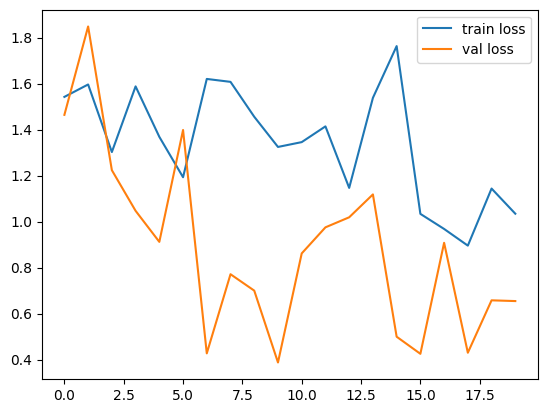

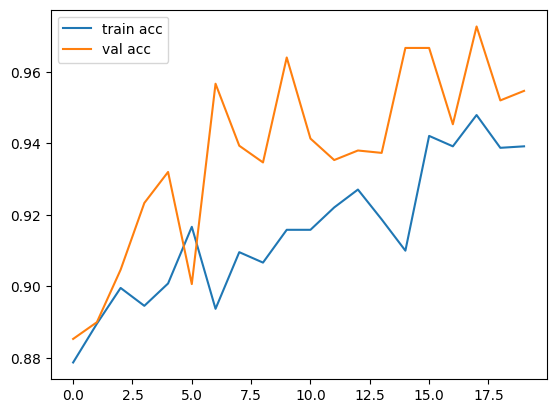

<Figure size 640x480 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [34]:

y_pred = model.predict(test_set)


94/94 [==============================] - 8s 74ms/step


In [35]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 5.2265762e-35, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0334543e-32,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.1388407e-26, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.9322604e-04,
        3.8419568e-23, 3.2155447e-21]], dtype=float32)

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([ 7,  0,  9, ...,  9,  7, 10])

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_inception.h5')

In [41]:
img=image.load_img('/content/drive/MyDrive/Crop past dataset1/test/Cashew_anthracnose/anthracnose1002_.jpg',target_size=(224,224))



In [52]:
img_data

array([[[[-0.9932949 , -0.99332565, -0.9931411 ],
         [-0.9932334 , -0.99326414, -0.9930796 ],
         [-0.9932949 , -0.99332565, -0.9931411 ],
         ...,
         [-0.9929566 , -0.9930181 , -0.9929258 ],
         [-0.9929258 , -0.99298733, -0.99283355],
         [-0.9929258 , -0.99298733, -0.99283355]],

        [[-0.9932334 , -0.99326414, -0.9930796 ],
         [-0.9932334 , -0.99326414, -0.9930796 ],
         [-0.9932949 , -0.99332565, -0.9931411 ],
         ...,
         [-0.9929258 , -0.99298733, -0.99289507],
         [-0.99289507, -0.9929566 , -0.99280274],
         [-0.99289507, -0.9929566 , -0.99280274]],

        [[-0.9932334 , -0.99326414, -0.9930796 ],
         [-0.9932334 , -0.99326414, -0.9930796 ],
         [-0.99332565, -0.9933564 , -0.9931719 ],
         ...,
         [-0.99289507, -0.9929566 , -0.9928643 ],
         [-0.9928643 , -0.9929258 , -0.992772  ],
         [-0.9928643 , -0.9929258 , -0.992772  ]],

        ...,

        [[-0.99338716, -0.9932949 , -0

In [47]:
xa=img.show()
print (xa)

None


In [48]:
x=image.img_to_array(img)
x

array([[[218., 217., 223.],
        [220., 219., 225.],
        [218., 217., 223.],
        ...,
        [229., 227., 230.],
        [230., 228., 233.],
        [230., 228., 233.]],

       [[220., 219., 225.],
        [220., 219., 225.],
        [218., 217., 223.],
        ...,
        [230., 228., 231.],
        [231., 229., 234.],
        [231., 229., 234.]],

       [[220., 219., 225.],
        [220., 219., 225.],
        [217., 216., 222.],
        ...,
        [231., 229., 232.],
        [232., 230., 235.],
        [232., 230., 235.]],

       ...,

       [[215., 218., 223.],
        [223., 226., 231.],
        [208., 211., 216.],
        ...,
        [219., 220., 224.],
        [218., 219., 223.],
        [213., 214., 218.]],

       [[217., 220., 227.],
        [216., 219., 226.],
        [214., 217., 224.],
        ...,
        [217., 220., 225.],
        [218., 221., 226.],
        [218., 221., 226.]],

       [[216., 219., 226.],
        [211., 214., 221.],
        [212., 2

In [43]:
x.shape

(224, 224, 3)

In [49]:
x=x/255

In [50]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [53]:
model.predict(img_data)

1/1 [==============================] - 0s 25ms/step


array([[3.1426914e-17, 2.1475593e-22, 6.0416279e-19, 6.3916288e-13,
        3.3556383e-11, 2.3365482e-15, 3.1194381e-16, 1.7712833e-16,
        1.4453588e-17, 2.6358594e-12, 1.2289039e-09, 2.2948721e-15,
        1.0000000e+00, 6.9607592e-15, 2.3412047e-12]], dtype=float32)

In [54]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 27ms/step


In [60]:
images_list = os.listdir(train_path)

In [65]:
num_images_to_display = 1

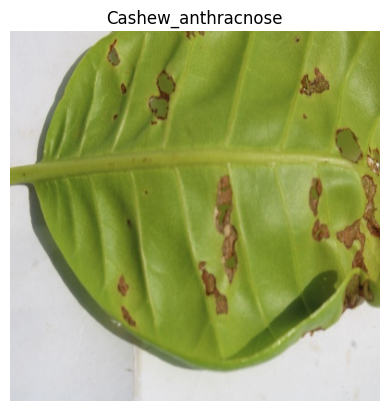

In [96]:
for i in range(num_images_to_display):
    img_path = os.path.join(train_path, images_list[i])
    img = Image.open("/content/drive/MyDrive/Crop past dataset1/train/Cashew_anthracnose/anthracnose1003_.jpg")
    plt.imshow(img)
    plt.title('Cashew_anthracnose')
    plt.axis('off')  # Remove axis
    plt.show()